# 📃 Solution for Exercise M4.05
In the previous notebook we set `penalty="none"` to disable regularization
entirely. This parameter can also control the **type** of regularization to use,
whereas the regularization **strength** is set using the parameter `C`.
Setting`penalty="none"` is equivalent to an infinitely large value of `C`.
In this exercise, we ask you to train a logistic regression classifier using the
`penalty="l2"` regularization (which happens to be the default in scikit-learn)
to find by yourself the effect of the parameter `C`.

We will start by loading the dataset.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins_classification.csv")
# only keep the Adelie and Chinstrap classes
penguins = penguins.set_index("Species").loc[
    ["Adelie", "Chinstrap"]].reset_index()

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_column = "Species"

In [2]:
from sklearn.model_selection import train_test_split

penguins_train, penguins_test = train_test_split(penguins, random_state=0)

data_train = penguins_train[culmen_columns]
data_test = penguins_test[culmen_columns]

target_train = penguins_train[target_column]
target_test = penguins_test[target_column]

First, let's create our predictive model.

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

logistic_regression = make_pipeline(
    StandardScaler(), LogisticRegression(penalty="l2"))

Given the following candidates for the `C` parameter, find out the impact of
`C` on the classifier decision boundary. You can use
`sklearn.inspection.DecisionBoundaryDisplay.from_estimator` to plot the
decision function boundary.

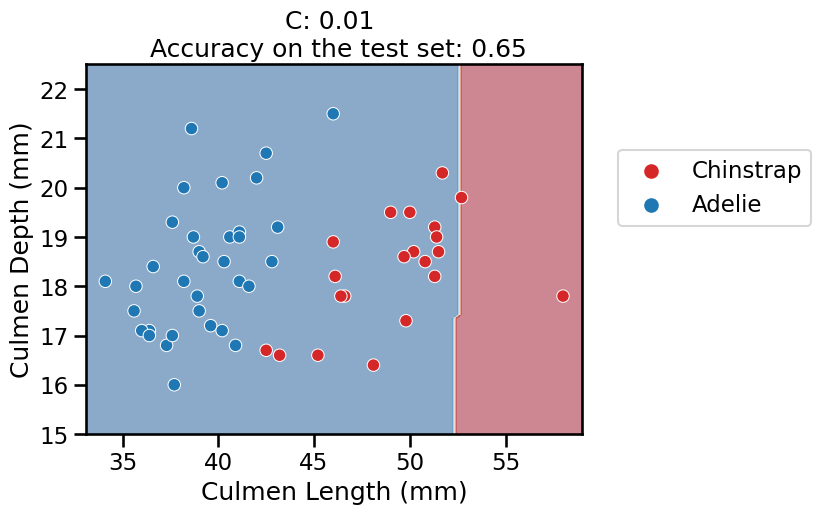

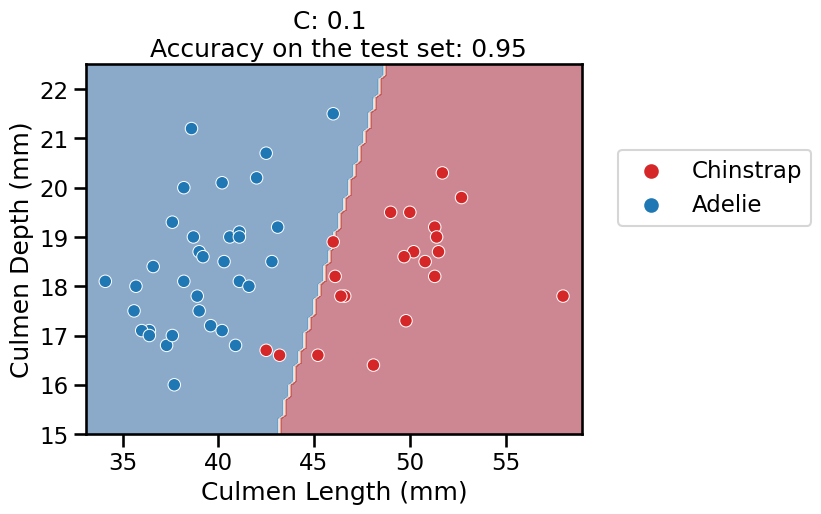

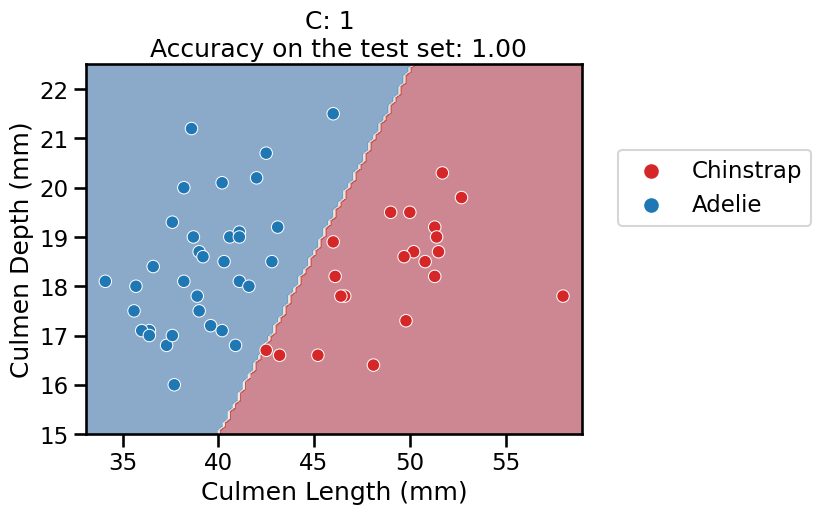

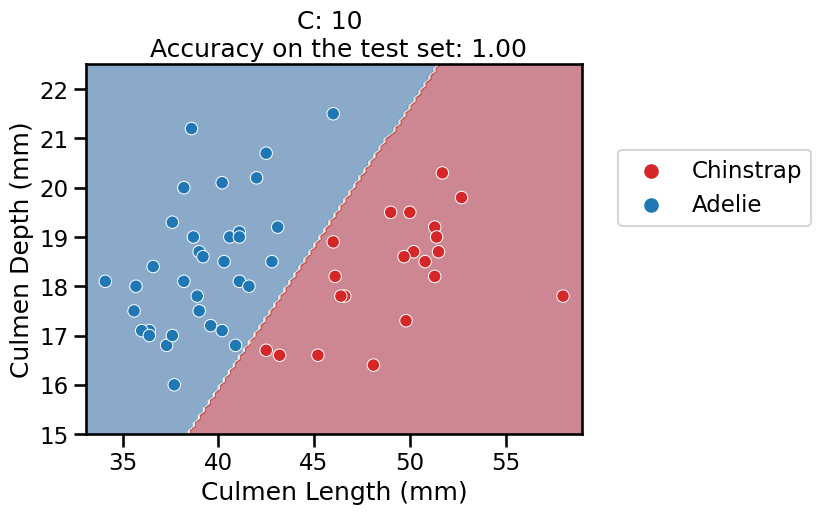

In [4]:
Cs = [0.01, 0.1, 1, 10]

# solution
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    logistic_regression.fit(data_train, target_train)
    accuracy = logistic_regression.score(data_test, target_test)

    DecisionBoundaryDisplay.from_estimator(
        logistic_regression,
        data_test,
        response_method="predict",
        cmap="RdBu_r",
        alpha=0.5,
    )
    sns.scatterplot(
        data=penguins_test, x=culmen_columns[0], y=culmen_columns[1],
        hue=target_column, palette=["tab:red", "tab:blue"])
    plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
    plt.title(f"C: {C} \n Accuracy on the test set: {accuracy:.2f}")

Look at the impact of the `C` hyperparameter on the magnitude of the weights.

In [5]:
# solution
weights_ridge = []
for C in Cs:
    logistic_regression.set_params(logisticregression__C=C)
    logistic_regression.fit(data_train, target_train)
    coefs = logistic_regression[-1].coef_[0]
    weights_ridge.append(pd.Series(coefs, index=culmen_columns))

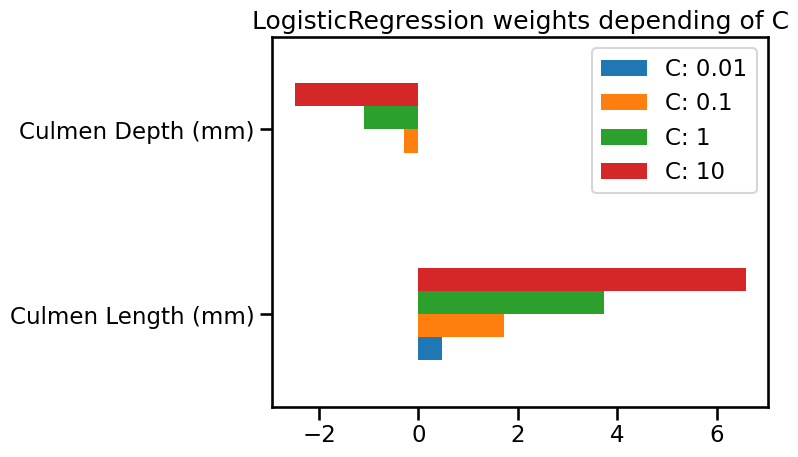

In [6]:
weights_ridge = pd.concat(
    weights_ridge, axis=1, keys=[f"C: {C}" for C in Cs])
weights_ridge.plot.barh()
_ = plt.title("LogisticRegression weights depending of C")

We see that a small `C` will shrink the weights values toward zero. It means
that a small `C` provides a more regularized model. Thus, `C` is the inverse
of the `alpha` coefficient in the `Ridge` model.

Besides, with a strong penalty (i.e. small `C` value), the weight of the
feature "Culmen Depth (mm)" is almost zero. It explains why the decision
separation in the plot is almost perpendicular to the "Culmen Length (mm)"
feature.

In [7]:
LogisticRegression?

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi